## 사전 설정

In [93]:
import pandas as pd
import numpy as np
from glob import glob
import warnings
warnings.filterwarnings('ignore')

In [94]:
import matplotlib.pyplot as plt
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

## 데이터 불러오기

In [95]:
files=glob('../JejuData/jeju_sales/*.csv')
files

['../JejuData/jeju_sales/제주특별자치도_주제3_상권분석을 위한 유동인구에 따른 카드 매출액 변화 데이터 활용_매쉬업결과_20(수정).csv',
 '../JejuData/jeju_sales/제주특별자치도_주제3_상권분석을 위한 유동인구에 따른 카드 매출액 변화 데이터 활용_매쉬업결과_18.csv',
 '../JejuData/jeju_sales/제주특별자치도_주제3_상권분석을 위한 유동인구에 따른 카드 매출액 변화 데이터 활용_매쉬업결과_19.csv']

In [96]:
tmps=[]

for file_name in files:
    tmp=pd.read_csv(file_name,encoding='euc-kr')
    tmps.append(tmp)

sales=pd.concat(tmps)
sales.head(10)

,년월,시도명,읍면동명,업종명,성별,이용자수,이용금액,거주인구,근무인구,방문인구,데이터기준일자
0,2020-01-01,서귀포시,남원읍,골프장 운영업,남성,1980,297727940,4869067.386,444319.725,3304302.997,2020-12-15
1,2020-01-01,제주시,외도동,수산물 소매업,남성,75,4657000,3651449.212,197093.412,1837113.079,2020-12-15
2,2020-01-01,제주시,오라동,중식 음식점업,남성,283,9340000,4759442.058,595571.433,4993516.699,2020-12-15
3,2020-01-01,제주시,오라동,자동차 임대업,남성,293,16523986,4759442.058,595571.433,4993516.699,2020-12-15
4,2020-01-01,제주시,오라동,스포츠 및 레크레이션 용품 임대업,남성,407,37918500,4759442.058,595571.433,4993516.699,2020-12-15
5,2020-01-01,제주시,오라동,한식 음식점업,남성,9694,285666860,4759442.058,595571.433,4993516.699,2020-12-15
6,2020-01-01,제주시,오라동,체인화 편의점,남성,8210,68812010,4759442.058,595571.433,4993516.699,2020-12-15
7,2020-01-01,제주시,오라동,차량용 주유소 운영업,남성,6245,315006743,4759442.058,595571.433,4993516.699,2020-12-15
8,2020-01-01,제주시,오라동,차량용 가스 충전업,남성,206,10271460,4759442.058,595571.433,4993516.699,2020-12-15
9,2020-01-01,제주시,오라동,화장품 및 방향제 소매업,남성,2,2280000,4759442.058,595571.433,4993516.699,2020-12-15


## 읍면동별 이용자 수 합계

In [97]:
kor=sales.groupby(by=['년월','읍면동명']).sum()[['이용자수','이용금액']]
kor.reset_index(inplace=True)
kor=kor[['년월','읍면동명','이용자수']]
kor.columns=['년월','읍면동명','방문자수']
kor

,년월,읍면동명,방문자수
0,2018-01-01,건입동,48561
1,2018-01-01,구좌읍,56243
2,2018-01-01,남원읍,47157
3,2018-01-01,노형동,309665
4,2018-01-01,대륜동,71001
...,...,...,...
1542,2020-12,표선면,43798
1543,2020-12,한경면,23535
1544,2020-12,한림읍,76913
1545,2020-12,화북동,58388


In [98]:
kor['년월'] = kor['년월'].str[0:7]

## 업종 선택

In [102]:
type_list=['서양식 음식점업', '기타 외국식 음식점업', '피자, 햄버거, 샌드위치 및 유사 음식점업', '한식 음식점업', '일식 음식점업', '중식 음식점업', '비알콜 음료점업']
df=sales[sales['업종명'].isin(type_list)]
df['년월'] = df['년월'].str[0:7]
df.sort_values(by=['년월','읍면동명','업종명'],ascending=True, inplace=True)

In [103]:
df

,년월,시도명,읍면동명,업종명,성별,이용자수,이용금액,거주인구,근무인구,방문인구,데이터기준일자
1457,2018-01,제주시,건입동,기타 외국식 음식점업,남성,116,4084620,2447350.787,442110.290,2758414.763,2020-12-15
1552,2018-01,제주시,건입동,기타 외국식 음식점업,여성,110,3548740,2488632.206,261825.028,2180482.260,2020-12-15
1426,2018-01,제주시,건입동,비알콜 음료점업,남성,259,2981280,2447350.787,442110.290,2758414.763,2020-12-15
1556,2018-01,제주시,건입동,비알콜 음료점업,여성,278,3399000,2488632.206,261825.028,2180482.260,2020-12-15
1565,2018-01,제주시,건입동,서양식 음식점업,여성,1490,25695350,2488632.206,261825.028,2180482.260,2020-12-15
...,...,...,...,...,...,...,...,...,...,...,...
26515,2020-12,서귀포시,효돈동,중식 음식점업,여성,160,4345000,1447374.270,101519.966,553046.890,2021-07-26
26488,2020-12,서귀포시,효돈동,"피자, 햄버거, 샌드위치 및 유사 음식점업",남성,47,396700,1535266.852,95602.039,631567.069,2021-07-26
26489,2020-12,서귀포시,효돈동,"피자, 햄버거, 샌드위치 및 유사 음식점업",여성,47,373340,1447374.270,101519.966,553046.890,2021-07-26
26490,2020-12,서귀포시,효돈동,한식 음식점업,남성,1497,49395500,1535266.852,95602.039,631567.069,2021-07-26


## 컬럼 정리

In [104]:
df2=df[['년월','읍면동명','업종명','이용금액']]
df2

,년월,읍면동명,업종명,이용금액
1457,2018-01,건입동,기타 외국식 음식점업,4084620
1552,2018-01,건입동,기타 외국식 음식점업,3548740
1426,2018-01,건입동,비알콜 음료점업,2981280
1556,2018-01,건입동,비알콜 음료점업,3399000
1565,2018-01,건입동,서양식 음식점업,25695350
...,...,...,...,...
26515,2020-12,효돈동,중식 음식점업,4345000
26488,2020-12,효돈동,"피자, 햄버거, 샌드위치 및 유사 음식점업",396700
26489,2020-12,효돈동,"피자, 햄버거, 샌드위치 및 유사 음식점업",373340
26490,2020-12,효돈동,한식 음식점업,49395500


## 매출이 0인 업종, 읍면동 추가

In [105]:
dict_tmp={}
dict_tmp['년월']=[]
dict_tmp['읍면동명']=[]
dict_tmp['업종명']=[]
dict_tmp['이용금액']=[]
for year in df2['년월'].unique():
    for dong in df2['읍면동명'].unique():
        for shop in df2['업종명'].unique():
            if df2[(df2['년월']==year) & (df2['읍면동명']==dong) & (df2['업종명']==shop)].shape[0]==0:
                dict_tmp['년월'].append(year)
                dict_tmp['읍면동명'].append(dong)
                dict_tmp['업종명'].append(shop)
                dict_tmp['이용금액'].append(0)

pd.DataFrame(dict_tmp)

,년월,읍면동명,업종명,이용금액
0,2018-01,도두동,"피자, 햄버거, 샌드위치 및 유사 음식점업",0
1,2018-01,봉개동,일식 음식점업,0
2,2018-01,영천동,기타 외국식 음식점업,0
3,2018-01,영천동,비알콜 음료점업,0
4,2018-01,영천동,일식 음식점업,0
...,...,...,...,...
525,2020-12,이호동,중식 음식점업,0
526,2020-12,이호동,"피자, 햄버거, 샌드위치 및 유사 음식점업",0
527,2020-12,추자면,기타 외국식 음식점업,0
528,2020-12,추자면,일식 음식점업,0


In [106]:
aggr2=pd.concat([df2,pd.DataFrame(dict_tmp)]).sort_values(by=['년월','읍면동명','업종명'])
aggr2.head()

,년월,읍면동명,업종명,이용금액
1457,2018-01,건입동,기타 외국식 음식점업,4084620
1552,2018-01,건입동,기타 외국식 음식점업,3548740
1426,2018-01,건입동,비알콜 음료점업,2981280
1556,2018-01,건입동,비알콜 음료점업,3399000
1565,2018-01,건입동,서양식 음식점업,25695350


In [107]:
aggr2

,년월,읍면동명,업종명,이용금액
1457,2018-01,건입동,기타 외국식 음식점업,4084620
1552,2018-01,건입동,기타 외국식 음식점업,3548740
1426,2018-01,건입동,비알콜 음료점업,2981280
1556,2018-01,건입동,비알콜 음료점업,3399000
1565,2018-01,건입동,서양식 음식점업,25695350
...,...,...,...,...
26515,2020-12,효돈동,중식 음식점업,4345000
26488,2020-12,효돈동,"피자, 햄버거, 샌드위치 및 유사 음식점업",396700
26489,2020-12,효돈동,"피자, 햄버거, 샌드위치 및 유사 음식점업",373340
26490,2020-12,효돈동,한식 음식점업,49395500


In [125]:
aggr2 = aggr2.groupby(['년월','읍면동명','업종명']).sum().reset_index()

In [133]:
aggr2

,년월,읍면동명,업종명,이용금액
0,2018-01,건입동,기타 외국식 음식점업,7633360
1,2018-01,건입동,비알콜 음료점업,6380280
2,2018-01,건입동,서양식 음식점업,60191200
3,2018-01,건입동,일식 음식점업,63654900
4,2018-01,건입동,중식 음식점업,6473500
...,...,...,...,...
10831,2020-12,효돈동,서양식 음식점업,22575750
10832,2020-12,효돈동,일식 음식점업,7570000
10833,2020-12,효돈동,중식 음식점업,13032500
10834,2020-12,효돈동,"피자, 햄버거, 샌드위치 및 유사 음식점업",770040


## 외국인 방문객 데이터 추가

In [108]:
# fore=pd.read_csv('../JejuData/floating_foreigner.csv')
# fore

,년월,국적,읍면동명,방문객수,시도명
0,2018-01,중국 외,남원읍,401.92,서귀포시
1,2018-01,중국 외,서홍동,42.31,서귀포시
2,2018-01,중국 외,성산읍,317.31,서귀포시
3,2018-01,중국 외,안덕면,423.08,서귀포시
4,2018-01,중국 외,예래동,84.62,서귀포시
...,...,...,...,...,...
171397,2020-12,중국 외,조천읍,0.58,제주시
171398,2020-12,중국 외,추자면,0.96,제주시
171399,2020-12,중국 외,한경면,0.19,제주시
171400,2020-12,중국 외,한림읍,0.13,제주시


In [126]:
fore=pd.read_csv('../JejuData/floating_foreigner_pop.csv')
fore.columns = ['년월','시도명','읍면동명','국적','방문객수']
fore

,년월,시도명,읍면동명,국적,방문객수
0,2018-01,제주시,건입동,중국,30589.44
1,2018-01,제주시,건입동,중국 외,32542.06
2,2018-01,제주시,구좌읍,중국,26691.16
3,2018-01,제주시,구좌읍,중국 외,14845.87
4,2018-01,서귀포시,남원읍,중국,179846.03
...,...,...,...,...,...
3091,2020-12,제주시,한림읍,중국 외,1349.65
3092,2020-12,제주시,화북동,중국,35.49
3093,2020-12,제주시,화북동,중국 외,338.90
3094,2020-12,서귀포시,효돈동,중국,41.11


In [134]:
df_ch=fore[fore['국적']=='중국']
df_ch.rename(columns={'방문객수':'중국인'},inplace=True)
df_ch.drop(columns=['국적','시도명'],inplace=True)
df_ch

,년월,읍면동명,중국인
0,2018-01,건입동,30589.44
2,2018-01,구좌읍,26691.16
4,2018-01,남원읍,179846.03
6,2018-01,노형동,145583.19
8,2018-01,대륜동,22743.85
...,...,...,...
3086,2020-12,표선면,146.92
3088,2020-12,한경면,41.86
3090,2020-12,한림읍,331.76
3092,2020-12,화북동,35.49


In [135]:
df_ot=fore[fore['국적']!='중국']
df_ot.rename(columns={'방문객수':'중국 외'},inplace=True)
df_ot.drop(columns=['국적','시도명'],inplace=True)
df_ot

,년월,읍면동명,중국 외
1,2018-01,건입동,32542.06
3,2018-01,구좌읍,14845.87
5,2018-01,남원읍,22754.32
7,2018-01,노형동,31173.26
9,2018-01,대륜동,12868.88
...,...,...,...
3087,2020-12,표선면,2106.80
3089,2020-12,한경면,2378.70
3091,2020-12,한림읍,1349.65
3093,2020-12,화북동,338.90


In [136]:
df_f=pd.merge(df_ch,df_ot,on=['년월','읍면동명'],how='inner')
df_f

,년월,읍면동명,중국인,중국 외
0,2018-01,건입동,30589.44,32542.06
1,2018-01,구좌읍,26691.16,14845.87
2,2018-01,남원읍,179846.03,22754.32
3,2018-01,노형동,145583.19,31173.26
4,2018-01,대륜동,22743.85,12868.88
...,...,...,...,...
1543,2020-12,표선면,146.92,2106.80
1544,2020-12,한경면,41.86,2378.70
1545,2020-12,한림읍,331.76,1349.65
1546,2020-12,화북동,35.49,338.90


## 방문자수 추가

In [130]:
aggr2['년월'].unique()

array(['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12'],
      dtype=object)

In [137]:
df_merged=pd.merge(aggr2,df_f,how='outer',on=['년월','읍면동명'])
df_merged=pd.merge(df_merged,kor,how='inner',on=['년월','읍면동명'])
df_merged['월']=[y.split('-')[1] for y in df_merged['년월']]
df_merged['연도']=[y.split('-')[0] for y in df_merged['년월']]
df_merged['외국인']=[c+o for c,o in zip(df_merged['중국인'],df_merged['중국 외'])]
df_merged=df_merged[['연도','월','읍면동명','업종명','이용금액','방문자수','중국인','중국 외','외국인']]
df_merged

,연도,월,읍면동명,업종명,이용금액,방문자수,중국인,중국 외,외국인
0,2018,01,건입동,기타 외국식 음식점업,7633360,48561,30589.44,32542.06,63131.50
1,2018,01,건입동,비알콜 음료점업,6380280,48561,30589.44,32542.06,63131.50
2,2018,01,건입동,서양식 음식점업,60191200,48561,30589.44,32542.06,63131.50
3,2018,01,건입동,일식 음식점업,63654900,48561,30589.44,32542.06,63131.50
4,2018,01,건입동,중식 음식점업,6473500,48561,30589.44,32542.06,63131.50
...,...,...,...,...,...,...,...,...,...
10824,2020,12,효돈동,서양식 음식점업,22575750,14683,41.11,32.54,73.65
10825,2020,12,효돈동,일식 음식점업,7570000,14683,41.11,32.54,73.65
10826,2020,12,효돈동,중식 음식점업,13032500,14683,41.11,32.54,73.65
10827,2020,12,효돈동,"피자, 햄버거, 샌드위치 및 유사 음식점업",770040,14683,41.11,32.54,73.65


In [132]:
df_merged.drop_duplicates()

,연도,월,읍면동명,업종명,이용금액,방문자수,중국인,중국 외,외국인
0,2018,01,건입동,기타 외국식 음식점업,7633360,48561,30589.44,32542.06,63131.50
1,2018,01,건입동,비알콜 음료점업,6380280,48561,30589.44,32542.06,63131.50
2,2018,01,건입동,서양식 음식점업,60191200,48561,30589.44,32542.06,63131.50
3,2018,01,건입동,일식 음식점업,63654900,48561,30589.44,32542.06,63131.50
4,2018,01,건입동,중식 음식점업,6473500,48561,30589.44,32542.06,63131.50
...,...,...,...,...,...,...,...,...,...
10824,2020,12,효돈동,서양식 음식점업,22575750,14683,41.11,32.54,73.65
10825,2020,12,효돈동,일식 음식점업,7570000,14683,41.11,32.54,73.65
10826,2020,12,효돈동,중식 음식점업,13032500,14683,41.11,32.54,73.65
10827,2020,12,효돈동,"피자, 햄버거, 샌드위치 및 유사 음식점업",770040,14683,41.11,32.54,73.65


___
## 임시

In [118]:
# df_s=pd.read_csv('../JejuData/sales_restaurant.csv')
# for i in ['거주인구','방문인구']:
#     df_s[i]=[j/379 for j in df_s[i]]

# df_s

In [119]:
# df_a=df_s.groupby(by=['년월','시도명','읍면동명','업종명']).sum()
# df_a.reset_index(inplace=True)
# df_a

___
## 업종명 간소화

In [120]:
types=[]
for res in df_merged['업종명']:
    if res=='비알콜 음료점업':
        types.append('음료')
    elif res=='서양식 음식점업':
        types.append('양식')
    elif res=='기타 외국식 음식점업':
        types.append('외국음식')
    elif res=='일식 음식점업':
        types.append('일식')
    elif res=='피자, 햄버거, 샌드위치 및 유사 음식점업':
        types.append('패스트푸드')
    elif res=='한식 음식점업':
        types.append('한식')
    elif res=='중식 음식점업':
        types.append('중식')
df_merged['업종명']=types

In [121]:
df_merged

,연도,월,읍면동명,업종명,이용금액,방문자수,중국인,중국 외,외국인
0,2018,01,건입동,외국음식,4084620,48561,30589.44,32542.06,63131.50
1,2018,01,건입동,외국음식,3548740,48561,30589.44,32542.06,63131.50
2,2018,01,건입동,음료,2981280,48561,30589.44,32542.06,63131.50
3,2018,01,건입동,음료,3399000,48561,30589.44,32542.06,63131.50
4,2018,01,건입동,양식,25695350,48561,30589.44,32542.06,63131.50
...,...,...,...,...,...,...,...,...,...
21115,2020,12,효돈동,중식,4345000,14683,41.11,32.54,73.65
21116,2020,12,효돈동,패스트푸드,396700,14683,41.11,32.54,73.65
21117,2020,12,효돈동,패스트푸드,373340,14683,41.11,32.54,73.65
21118,2020,12,효돈동,한식,49395500,14683,41.11,32.54,73.65


___
## 머신 러닝

In [122]:
df_merged

,연도,월,읍면동명,업종명,이용금액,방문자수,중국인,중국 외,외국인
0,2018,01,건입동,외국음식,4084620,48561,30589.44,32542.06,63131.50
1,2018,01,건입동,외국음식,3548740,48561,30589.44,32542.06,63131.50
2,2018,01,건입동,음료,2981280,48561,30589.44,32542.06,63131.50
3,2018,01,건입동,음료,3399000,48561,30589.44,32542.06,63131.50
4,2018,01,건입동,양식,25695350,48561,30589.44,32542.06,63131.50
...,...,...,...,...,...,...,...,...,...
21115,2020,12,효돈동,중식,4345000,14683,41.11,32.54,73.65
21116,2020,12,효돈동,패스트푸드,396700,14683,41.11,32.54,73.65
21117,2020,12,효돈동,패스트푸드,373340,14683,41.11,32.54,73.65
21118,2020,12,효돈동,한식,49395500,14683,41.11,32.54,73.65


In [22]:
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.svm import SVR
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.neural_network import MLPRegressor
# from sklearn.model_selection import train_test_split

# df_onehot=df_merged.copy()
# for column in ['월','읍면동명','업종명']:
#     df_total2=pd.get_dummies(df_merged[column],prefix=column)
#     df_onehot=pd.concat([df_onehot,df_total2],axis=1)
# df_onehot.drop(columns=['연도','월','읍면동명','업종명','외국인','중국 외'],inplace=True)

# train_input,test_input,train_target,test_target=train_test_split(df_onehot.iloc[:,1:],df_onehot[['이용금액']])
# sub_input,val_input,sub_target,val_target=train_test_split(train_input,train_target,test_size=0.2)

# knn=KNeighborsRegressor()
# svr=SVR()
# gpr=GaussianProcessRegressor()
# dt=DecisionTreeRegressor()
# rf=RandomForestRegressor()
# ab=AdaBoostRegressor()
# mlp=MLPRegressor()

# machines=[knn,svr,gpr,dt,rf,ab,mlp]
# scores={}
# scores['Train']=[]
# scores['Valid']=[]
# scores['Test']=[]

# for machine in machines:
#     machine.fit(sub_input,sub_target)
#     scores['Train'].append(machine.score(sub_input,sub_target))
#     scores['Valid'].append(machine.score(val_input,val_target))
#     scores['Test'].append(machine.score(test_input,test_target))

# df_scores=pd.DataFrame(scores)
# df_scores.index=['KNN','SVM','GaussianProcess','Decision Tree','RandomForest','Adaboost','MLP']
# df_scores

# import seaborn as sns

# fig=plt.figure(figsize=(15,9))
# ax1=fig.add_subplot(1,1,1)

# sns.heatmap(
#     df_scores,
#     annot=True,
#     cmap='Blues',
#     fmt='.5f',
#     cbar=False,
#     linewidth=1,
#     ax=ax1
# )

# plt.title('모델별 예측력',size=20)
# plt.yticks(rotation=0)
# plt.show()

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
rf = RandomForestRegressor()
df_onehot=df_merged.copy()
for column in ['월','읍면동명','업종명']:
    df_total2=pd.get_dummies(df_merged[column],prefix=column)
    df_onehot=pd.concat([df_onehot,df_total2],axis=1)
df_onehot.drop(columns=['연도','월','읍면동명','업종명','외국인','중국 외'],inplace=True)

train_input,test_input,train_target,test_target=train_test_split(df_onehot.iloc[:,1:],df_onehot[['이용금액']])
sub_input,val_input,sub_target,val_target=train_test_split(train_input,train_target,test_size=0.2)
rf.fit(sub_input,sub_target)

scores = {}
scores['Train']=[]
scores['Valid']=[]
scores['Test']=[]

scores['Train'].append(rf.score(sub_input,sub_target))
scores['Valid'].append(rf.score(val_input,val_target))
scores['Test'].append(rf.score(test_input,test_target))

NameError: name 'df_merged' is not defined

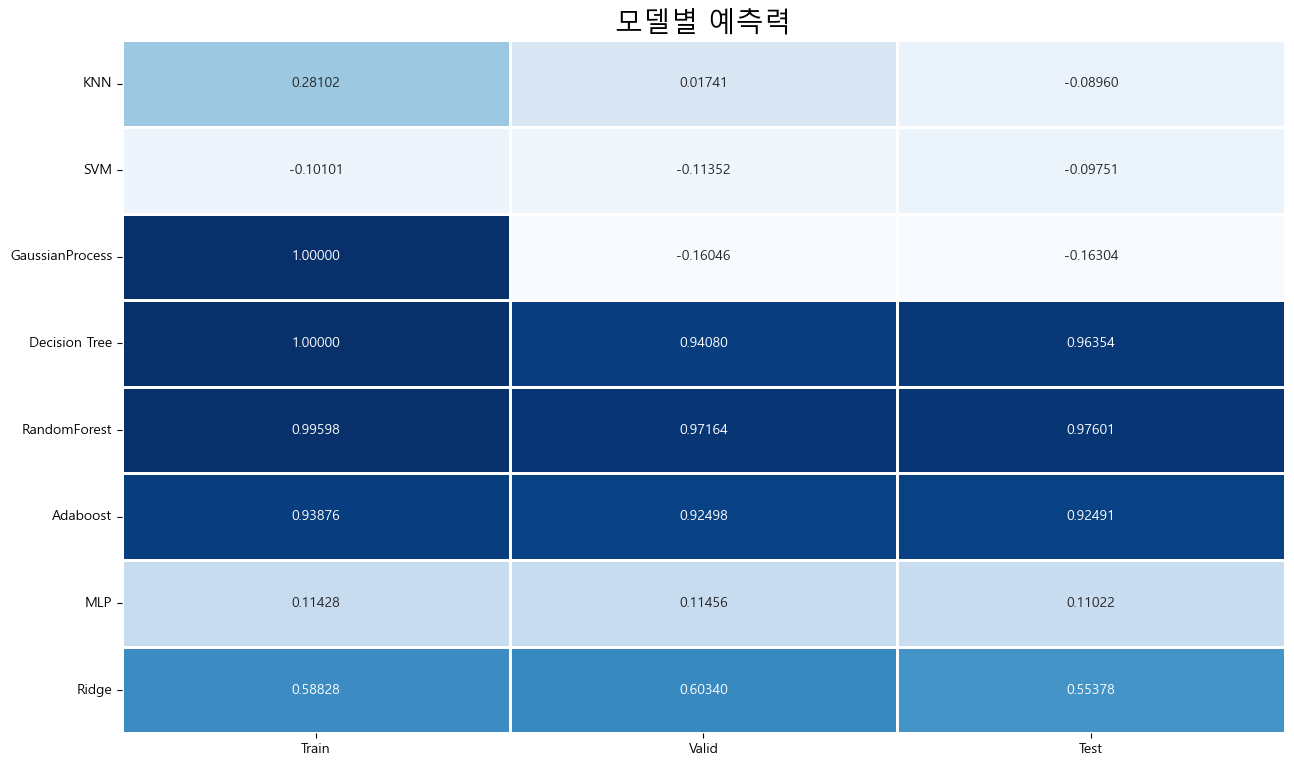

In [ ]:
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.svm import SVR
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.neural_network import MLPRegressor
# from sklearn.linear_model import Ridge
# from sklearn.model_selection import train_test_split

# df_onehot=df_merged.copy()
# for column in ['업종명','월']:
#     df_total2=pd.get_dummies(df_merged[column],prefix=column)
#     df_onehot=pd.concat([df_onehot,df_total2],axis=1)
# df_onehot.drop(columns=['연도','월','읍면동명','업종명'],inplace=True)

# train_input,test_input,train_target,test_target=train_test_split(df_onehot.iloc[:,1:],df_onehot[['이용금액']])
# sub_input,val_input,sub_target,val_target=train_test_split(train_input,train_target,test_size=0.2)

# knn=KNeighborsRegressor()
# svr=SVR()
# gpr=GaussianProcessRegressor()
# dt=DecisionTreeRegressor()
# rf=RandomForestRegressor()
# ab=AdaBoostRegressor()
# mlp=MLPRegressor()
# ridge=Ridge(alpha=10)

# machines=[knn,svr,gpr,dt,rf,ab,mlp,ridge]
# scores={}
# scores['Train']=[]
# scores['Valid']=[]
# scores['Test']=[]

# for machine in machines:
#     machine.fit(sub_input,sub_target)
#     scores['Train'].append(machine.score(sub_input,sub_target))
#     scores['Valid'].append(machine.score(val_input,val_target))
#     scores['Test'].append(machine.score(test_input,test_target))

# df_scores=pd.DataFrame(scores)
# df_scores.index=['KNN','SVM','GaussianProcess','Decision Tree','RandomForest','Adaboost','MLP','Ridge']
# df_scores

# import seaborn as sns

# fig=plt.figure(figsize=(15,9))
# ax1=fig.add_subplot(1,1,1)

# sns.heatmap(
#     df_scores,
#     annot=True,
#     cmap='Blues',
#     fmt='.5f',
#     cbar=False,
#     linewidth=1,
#     ax=ax1
# )

# plt.title('모델별 예측력',size=20)
# plt.yticks(rotation=0)
# plt.show()

In [ ]:
df_onehot.iloc[:,1:]

,방문자수,중국인,중국 외,외국인,업종명_양식,업종명_외국음식,업종명_음료,업종명_일식,업종명_중식,업종명_패스트푸드,...,월_03,월_04,월_05,월_06,월_07,월_08,월_09,월_10,월_11,월_12
0,57061,30589.44,32542.06,63131.50,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57061,30589.44,32542.06,63131.50,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,57061,30589.44,32542.06,63131.50,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,57061,30589.44,32542.06,63131.50,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,57061,30589.44,32542.06,63131.50,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10831,16671,41.11,32.54,73.65,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10832,16671,41.11,32.54,73.65,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
10833,16671,41.11,32.54,73.65,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
10834,16671,41.11,32.54,73.65,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
np.corrcoef(df_merged['방문자수'],df_merged['중국 외'])

array([[1.        , 0.42797598],
       [0.42797598, 1.        ]])

___
## 차트

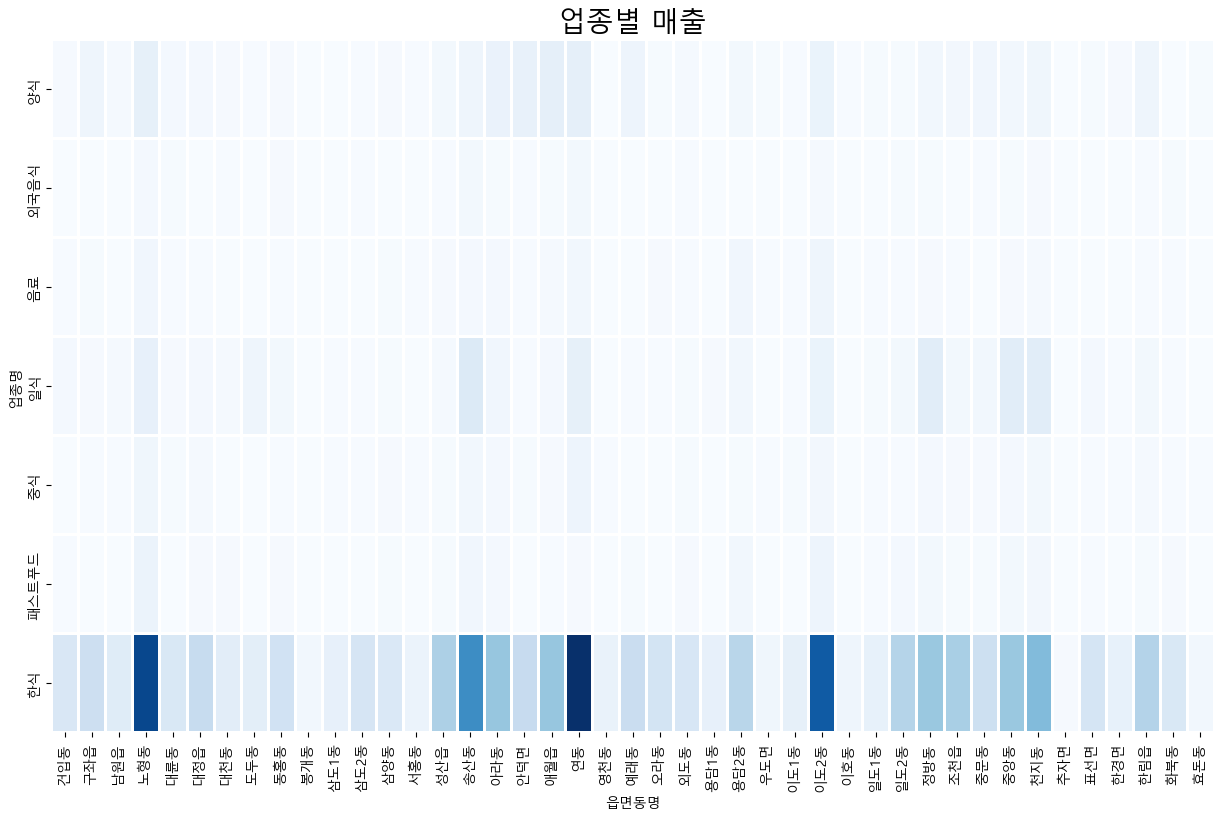

In [ ]:
import seaborn as sns

fig=plt.figure(figsize=(15,9))
ax1=fig.add_subplot(1,1,1)

sns.heatmap(
    df_merged.pivot_table(index='업종명',columns='읍면동명',values='이용금액',aggfunc='sum'),
    linewidth=1,
    cmap='Blues',
    ax=ax1,
    cbar=False
)

ax1.set_title('업종별 매출',size=20)
plt.show()

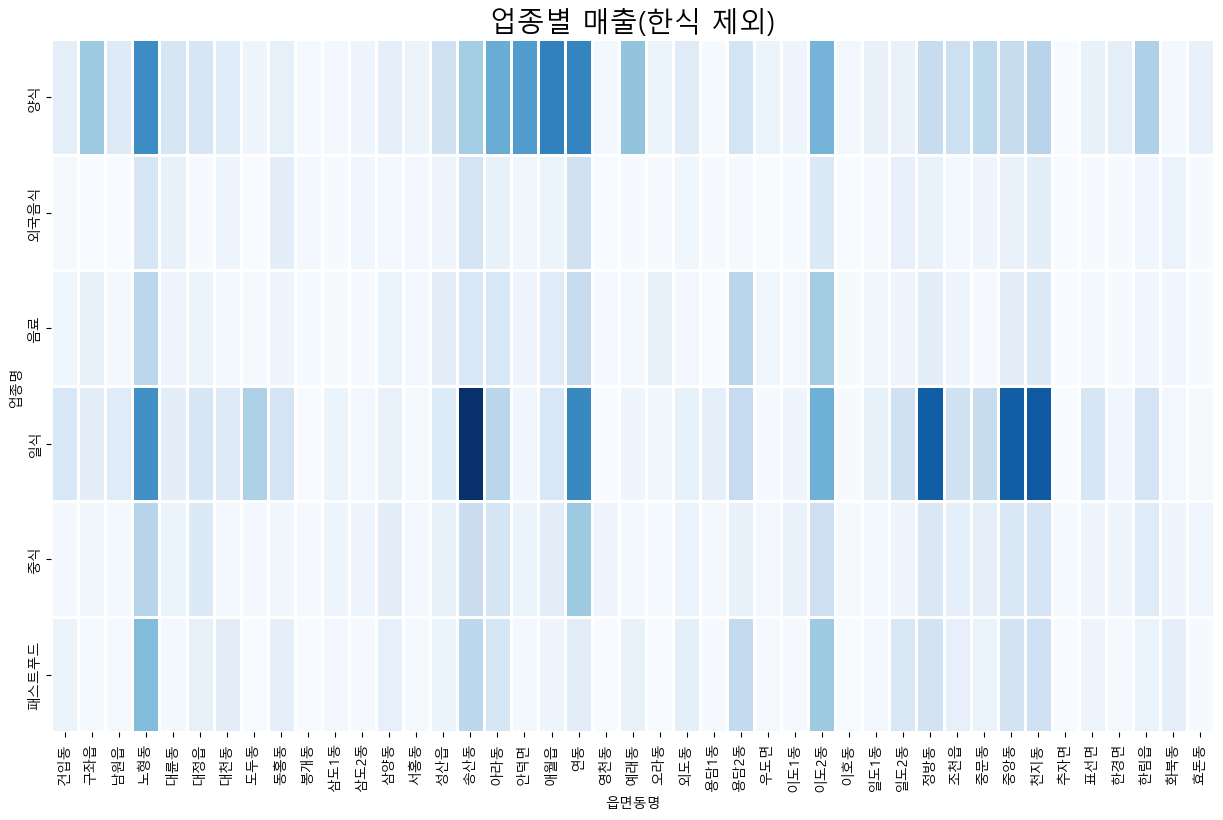

In [ ]:
fig=plt.figure(figsize=(15,9))
ax1=fig.add_subplot(1,1,1)

sns.heatmap(
    df_merged[df_merged['업종명']!='한식'].pivot_table(index='업종명',columns='읍면동명',values='이용금액',aggfunc='sum'),
    linewidth=1,
    cmap='Blues',
    ax=ax1,
    cbar=False
)
ax1.set_title('업종별 매출(한식 제외)',size=20)
plt.show()

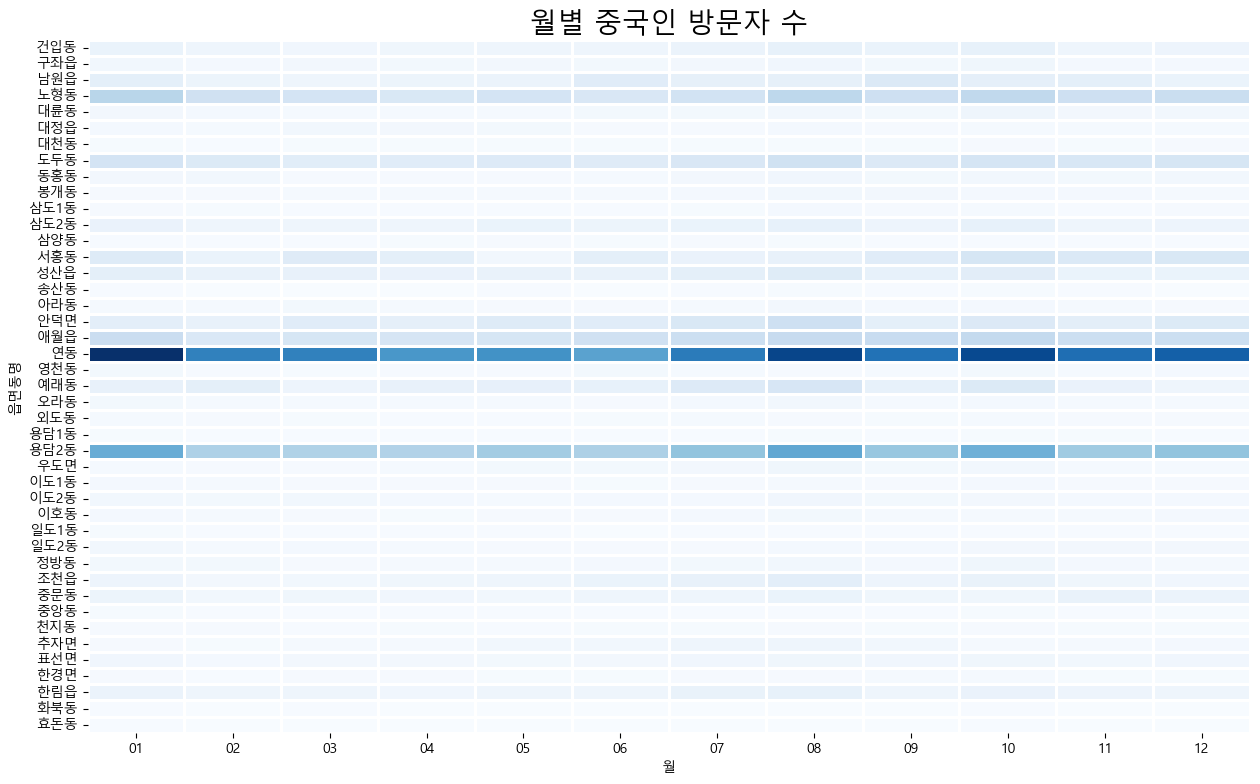

In [ ]:
import seaborn as sns

fig=plt.figure(figsize=(15,9))
ax1=fig.add_subplot(1,1,1)

sns.heatmap(
    df_merged.pivot_table(index='읍면동명',columns='월',values='중국인',aggfunc='mean'),
    linewidth=1,
    cmap='Blues',
    ax=ax1,
    cbar=False
)

ax1.set_title('월별 중국인 방문자 수',size=20)
plt.show()

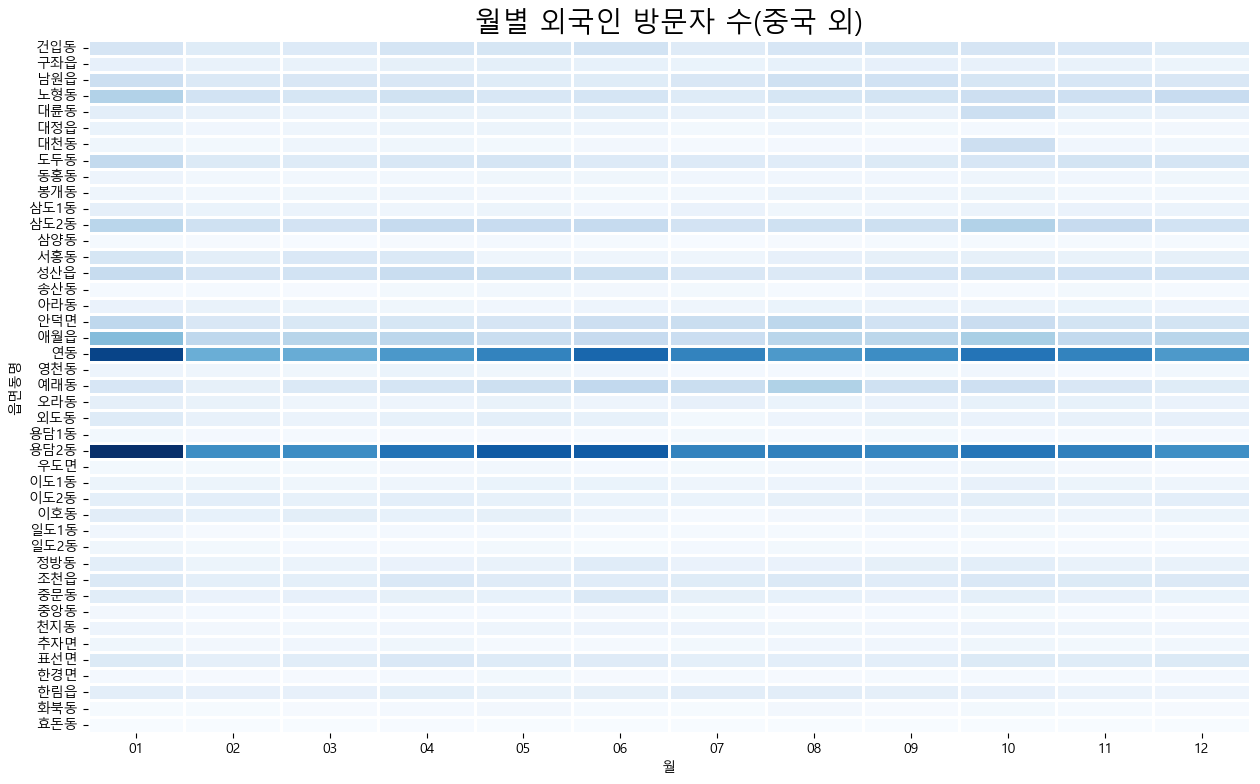

In [ ]:
import seaborn as sns

fig=plt.figure(figsize=(15,9))
ax1=fig.add_subplot(1,1,1)

sns.heatmap(
    df_merged.pivot_table(index='읍면동명',columns='월',values='중국 외',aggfunc='mean'),
    linewidth=1,
    cmap='Blues',
    ax=ax1,
    cbar=False
)

ax1.set_title('월별 외국인 방문자 수(중국 외)',size=20)
plt.show()

In [ ]:
df_merged2=df_merged.copy()
df_merged2['년월']=[f'{y}-{m}' for y,m in zip(df_merged2['연도'],df_merged2['월'])]
df_merged2

,연도,월,읍면동명,업종명,이용금액,방문자수,중국인,중국 외,외국인,년월
0,2018,01,건입동,외국음식,9036400,57061,30589.44,32542.06,63131.50,2018-01
1,2018,01,건입동,음료,8264020,57061,30589.44,32542.06,63131.50,2018-01
2,2018,01,건입동,양식,66781910,57061,30589.44,32542.06,63131.50,2018-01
3,2018,01,건입동,일식,86571700,57061,30589.44,32542.06,63131.50,2018-01
4,2018,01,건입동,중식,10550000,57061,30589.44,32542.06,63131.50,2018-01
...,...,...,...,...,...,...,...,...,...,...
10831,2020,12,효돈동,양식,25371750,16671,41.11,32.54,73.65,2020-12
10832,2020,12,효돈동,일식,8581000,16671,41.11,32.54,73.65,2020-12
10833,2020,12,효돈동,중식,18268000,16671,41.11,32.54,73.65,2020-12
10834,2020,12,효돈동,패스트푸드,842540,16671,41.11,32.54,73.65,2020-12


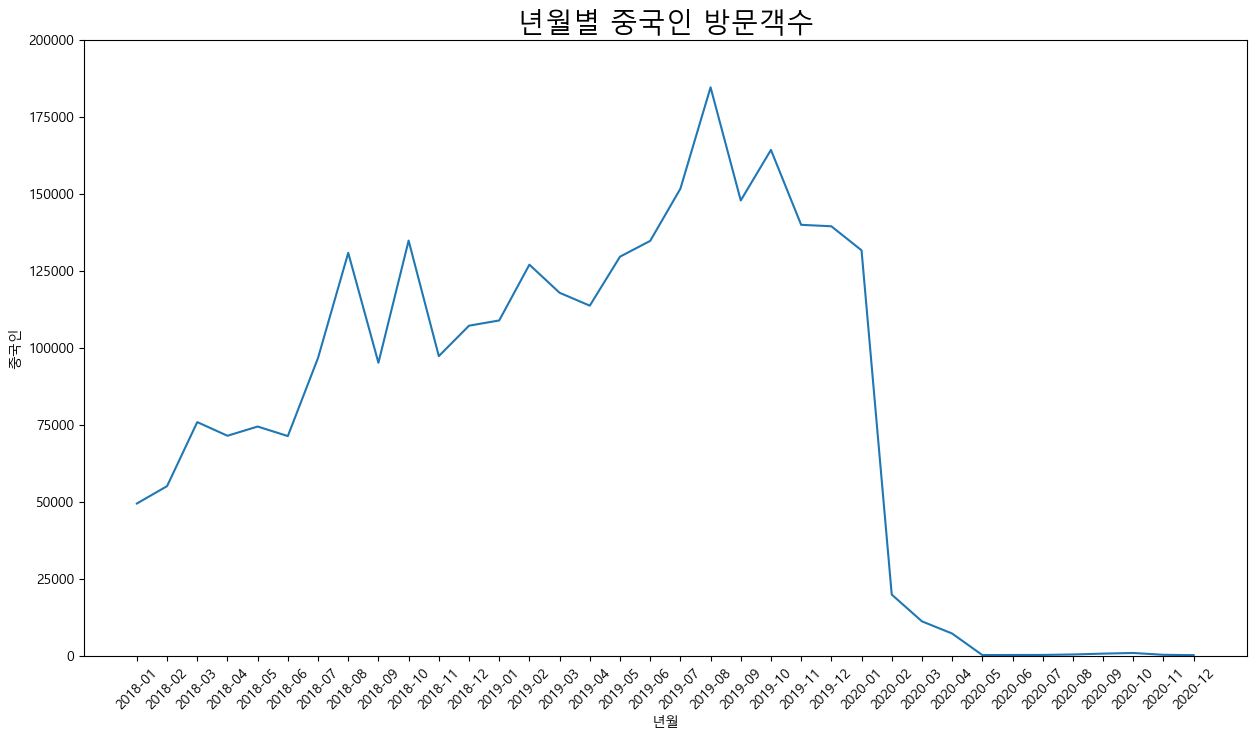

In [ ]:
import seaborn as sns

fig=plt.figure(figsize=(15,8))
ax1=fig.add_subplot(1,1,1)

sns.lineplot(
    x='년월',
    y='중국인',
    data=df_merged2,
    ax=ax1,
    ci=None
)

plt.xticks(rotation=45)
ax1.set_ylim(0,200000)
plt.title('년월별 중국인 방문객수',size=20)
plt.show()

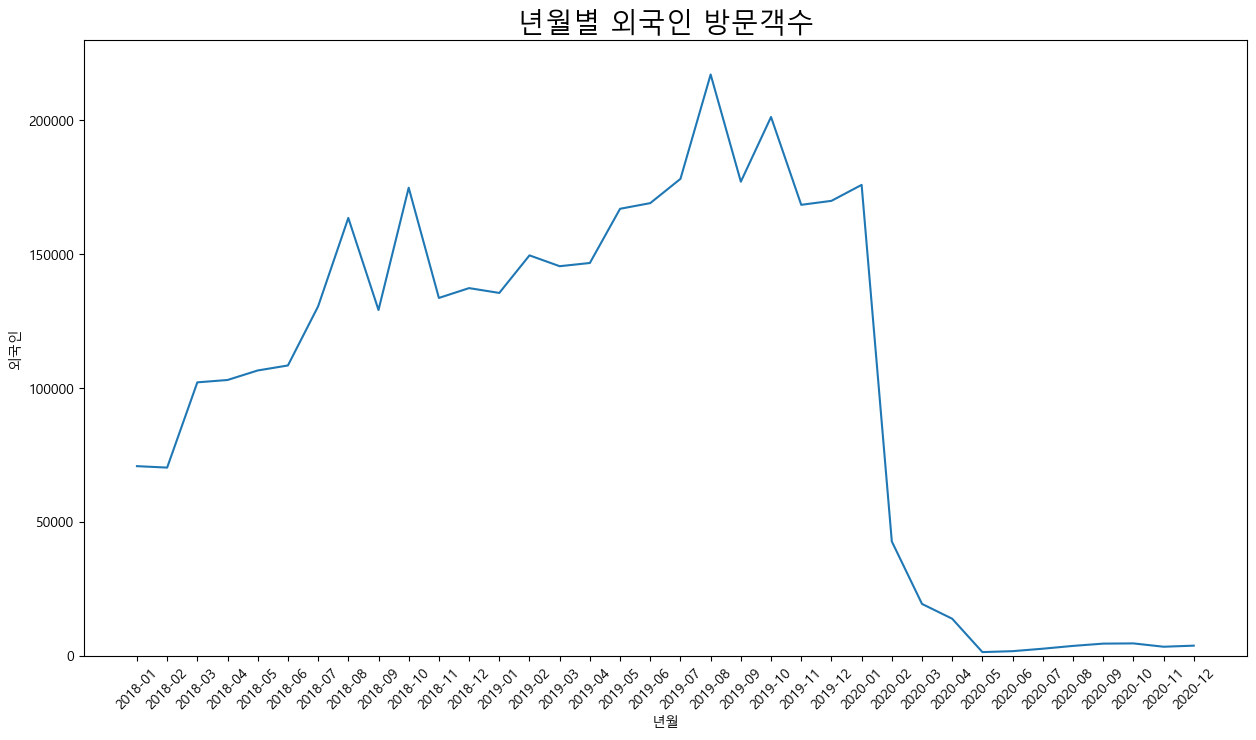

In [ ]:
fig=plt.figure(figsize=(15,8))
ax1=fig.add_subplot(1,1,1)

sns.lineplot(
    x='년월',
    y='외국인',
    data=df_merged2,
    ax=ax1,
    ci=None
)

plt.xticks(rotation=45)
plt.title('년월별 외국인 방문객수',size=20)
ax1.set_ylim(0,230000)
plt.show()

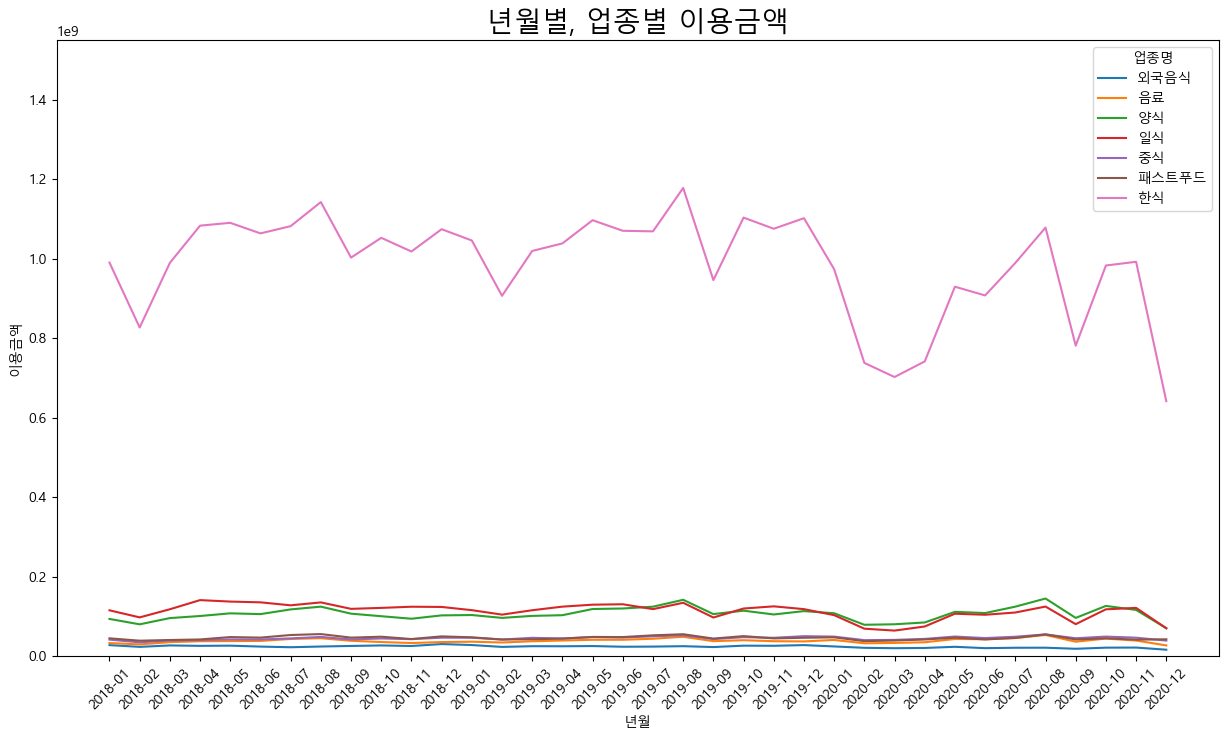

In [ ]:
fig=plt.figure(figsize=(15,8))
ax1=fig.add_subplot(1,1,1)

sns.lineplot(
    x='년월',
    y='이용금액',
    hue='업종명',
    data=df_merged2,
    ax=ax1,
    ci=None
)

plt.xticks(rotation=45)
plt.title('년월별, 업종별 이용금액',size=20)
ax1.set_ylim(0,1550000000)
plt.show()

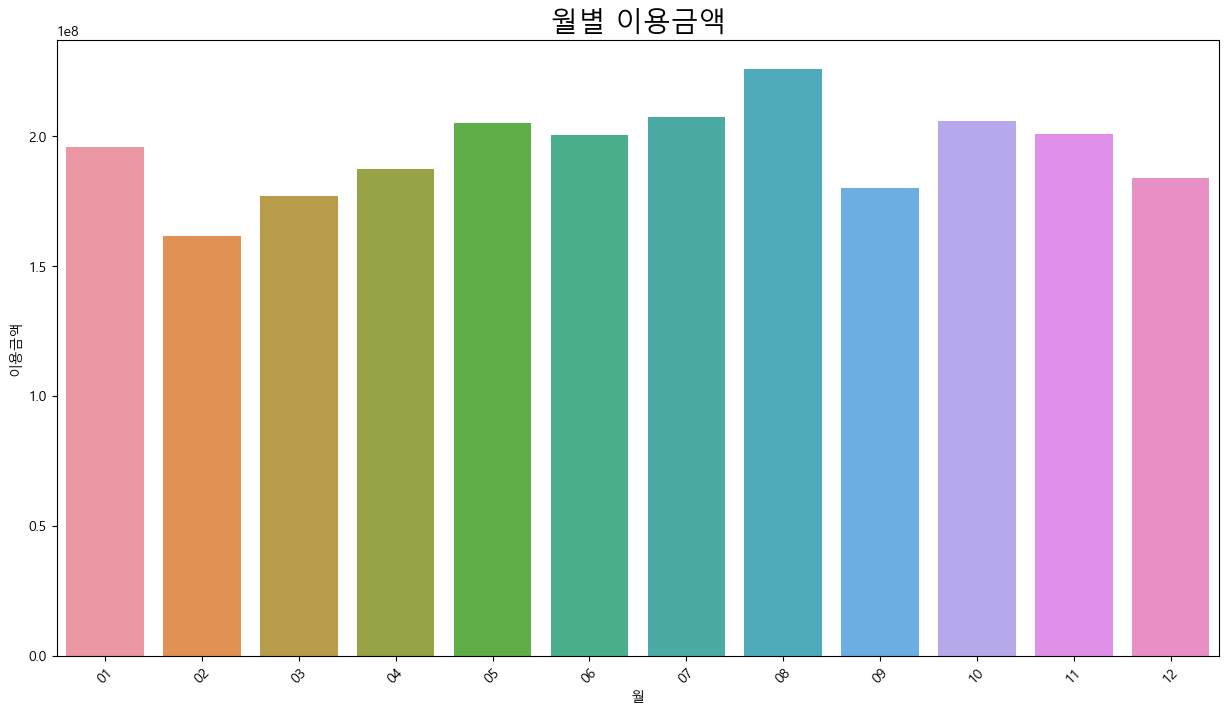

In [ ]:
fig=plt.figure(figsize=(15,8))
ax1=fig.add_subplot(1,1,1)

sns.barplot(
    x='월',
    y='이용금액',
    data=df_merged2,
    ax=ax1,
    ci=None
)

plt.xticks(rotation=45)
plt.title('월별 이용금액',size=20)
plt.show()

In [ ]:
df_merged['외국인']=[c+o for c,o in zip(df_merged['중국인'],df_merged['중국 외'])]
df_merged

,연도,월,읍면동명,업종명,이용금액,방문자수,중국인,중국 외,외국인
0,2018,01,건입동,외국음식,9036400,57061,30589.44,32542.06,63131.50
1,2018,01,건입동,음료,8264020,57061,30589.44,32542.06,63131.50
2,2018,01,건입동,양식,66781910,57061,30589.44,32542.06,63131.50
3,2018,01,건입동,일식,86571700,57061,30589.44,32542.06,63131.50
4,2018,01,건입동,중식,10550000,57061,30589.44,32542.06,63131.50
...,...,...,...,...,...,...,...,...,...
10831,2020,12,효돈동,양식,25371750,16671,41.11,32.54,73.65
10832,2020,12,효돈동,일식,8581000,16671,41.11,32.54,73.65
10833,2020,12,효돈동,중식,18268000,16671,41.11,32.54,73.65
10834,2020,12,효돈동,패스트푸드,842540,16671,41.11,32.54,73.65


In [ ]:
np.corrcoef(df_merged['중국인'],df_merged['중국 외'])

array([[1.        , 0.83481465],
       [0.83481465, 1.        ]])

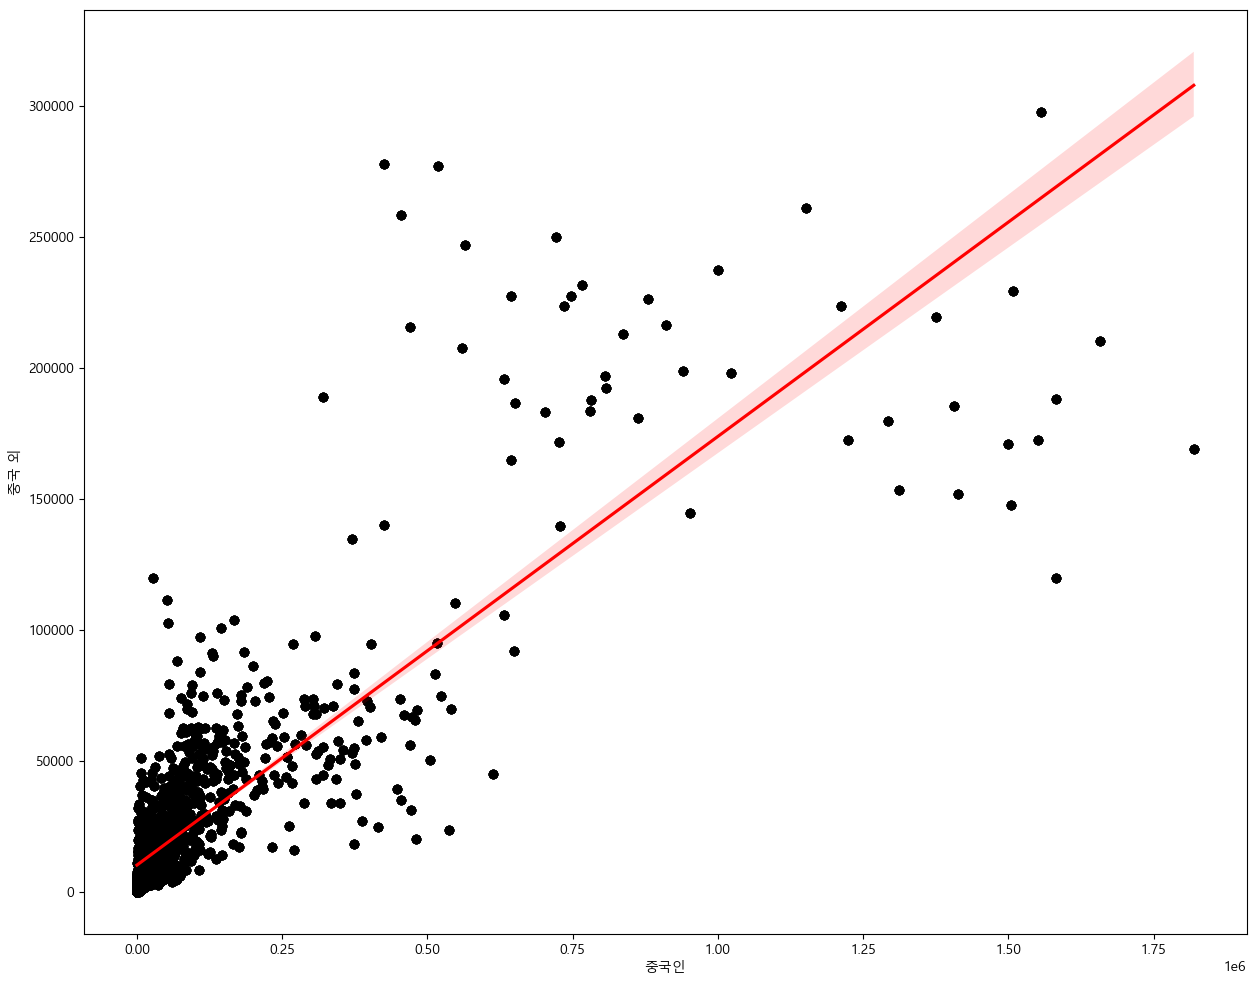

In [ ]:
fig=plt.figure(figsize=(15,12))
ax1=fig.add_subplot(1,1,1)

sns.regplot(
    x='중국인',
    y='중국 외',
    data=df_merged,
    scatter_kws={'color':'black'}, #scatter color
    line_kws={'color':'red'}, #regression line color
    ax=ax1,
    fit_reg=True
)

plt.show()

In [ ]:
np.corrcoef(df_merged['외국인'],df_merged['이용금액'])

array([[1.       , 0.1683993],
       [0.1683993, 1.       ]])

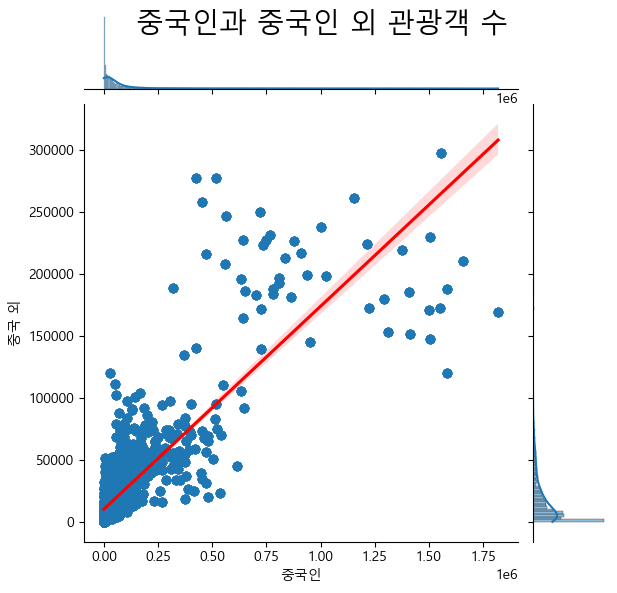

In [ ]:
j1=sns.jointplot(
    x='중국인',
    y='중국 외',
    data=df_merged,
    kind='reg',
    joint_kws={},
    line_kws={'color':'red'},
)
# j1.set_axis_labels(xlabel='이용자 수(명)',ylabel='이용 금액(10만 원)')
j1.fig.suptitle('중국인과 중국인 외 관광객 수',size=20)
plt.show()